# Leads Scoring case study

###  Problem statement: 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as __‘Hot Leads’__. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

### Goal of the case study:
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. The main objective of the case study is __reduce number of False negative results__ i.e the comapny shouldn't missout any potential lead. We need target for __higher recall score__.

## Flow of the case study:

* Step1: Reading and Understanding the data<br>
* Step2: Exploratory Data Analysis<br>
* Step3: Data preprocessing<br>
* Step4: Traing different models<br>
    * Model1: With all the features<br>
    * Model2: With features after RFE<br>
    * Model3: With features after extracting feature importance<br>
    * Model4: after dropping the insignificant features<br>
* Step5: Evaluating the fianl model<br>
* Step6: Adjusting the cut-off to optimize sensitivity and specifity trade-off<br>
* Step7: Evaluating on Test set<br>
* Step8: Conclutions<br>



## Importing the Libraries

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## <font color ='green'> Step1: Data reading and understanding

In [158]:
# importing the data

df = pd.read_csv('Leads.csv')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [160]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [161]:
df.shape

(9240, 37)

In [162]:
# checking the null values
((df.isnull().sum()/df.shape[0]) * 100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

'Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index' these features have more than 45% missing values.  

In [163]:
# Removing columns with more than 45 % missing values
df = df.drop(columns=['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score',
                 'Asymmetrique Activity Score','Asymmetrique Profile Index'],axis=1)

In [164]:
df.shape

(9240, 32)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [166]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened


In [167]:
# checking for duplicated values
df.duplicated().sum()

0

In [168]:
# droping Prospect ID and Lead Number as they are jus index columns
df = df.drop(columns=['Prospect ID','Lead Number'],axis=1)

In [169]:
df.shape

(9240, 30)

In [170]:
# checking for duplicated values
df.duplicated().sum()

1549

## <font color ='green'>Step2: Exploratory Data analysis

### 2.1 Univarite Analysis and Bivariate Analysis

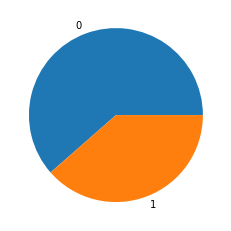

In [171]:
# checking data inmbalance

plt.pie(df['Converted'].value_counts(),labels=[0,1])
plt.show()

In [172]:
df['Converted'].value_counts()
((df['Converted'].value_counts().values[0]-df['Converted'].value_counts().values[1])/df.shape[0])*100

22.92207792207792

__There isn't huge imbalance in the data__

### Numerical colums

In [173]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


There are outliers in numerical features

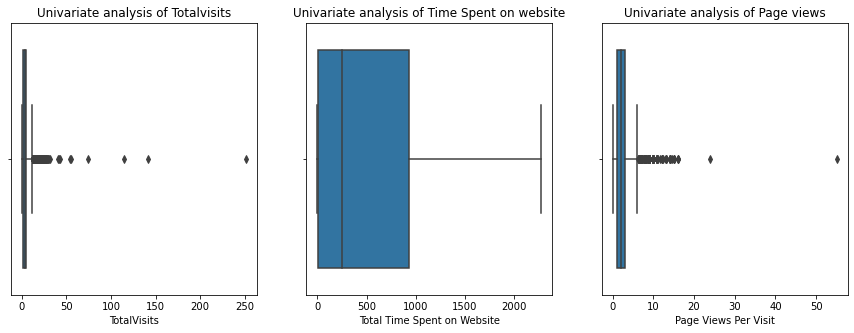

In [174]:
# plotting the boxplots to check for outliers
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Univariate analysis of Totalvisits')
sns.boxplot(df['TotalVisits'])
plt.subplot(1,3,2)
plt.title('Univariate analysis of Time Spent on website')
sns.boxplot(df['Total Time Spent on Website'])
plt.subplot(1,3,3)
plt.title('Univariate analysis of Page views')
sns.boxplot(df['Page Views Per Visit'])
plt.show()

Clearly we can see there are outliers in Total vists and Page views

<Figure size 720x360 with 0 Axes>

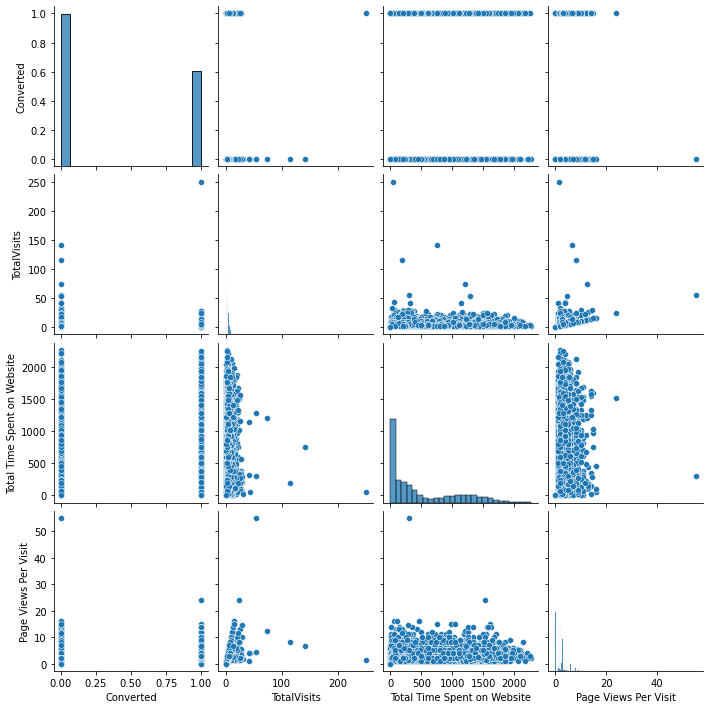

In [175]:
# Plotting numerical values on scatter plot 

plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.show()

After remal of outliers we might get better results

### Categorical Features

In [176]:
# extracting the categorical data
df_cat = df.drop(df._get_numeric_data().columns,axis = 1)

In [177]:
df_cat.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [178]:
# checking the value counts of each feature
for i in df_cat.columns:
    print(df_cat[i].value_counts())
    print('No. of Unique values:',len(df_cat[i].unique()))
    print('\n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
No. of Unique values: 5


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
No. of Unique values: 22


No     8506
Yes     734
Name: Do Not Email, dtype: int64
No. of Unique values: 2


No     9238
Yes       2
Name: Do Not Call, dtype: int64
No. of Unique values: 2


Email Opened

- there 13 binary value features 
- few features have unique value as select, which implies the user didn't mention that value. So, that can be treated as null value
- Lead source has value correction google to Google

In [179]:
# correcting the value in Lead source
df['Lead Source'] = df['Lead Source'].replace('google','Google')

In [180]:
# univariate analysis of binary features

# Extracting the list of columns
bin_cols = [i for i in df_cat.columns if len(df_cat[i].unique()) <=2 ]
bin_cols


['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

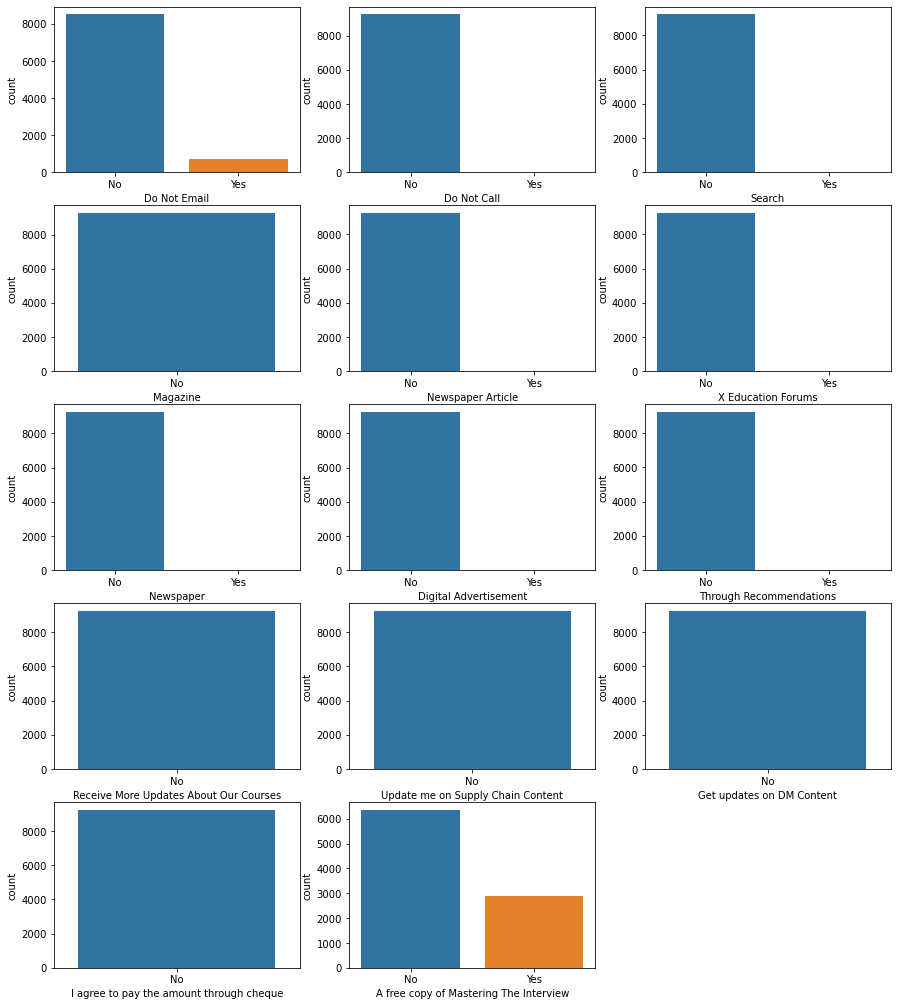

In [181]:
# plot the values on count plot
list_1=list(enumerate(bin_cols))

plt.figure(figsize=(15,25))
for i in list_1:
    plt.subplot(7,3,(i[0]+1))
    plt.xlabel(i[1])
    sns.countplot(x=i[1],data=df)

As we can see except copy of mastering the interview, most the values are no. So these features doesn't really effect the target column. We can drop them.

In [182]:
# analysis on remaining columns with respective target column

df_cat_1 = df_cat.drop(bin_cols,axis=1)

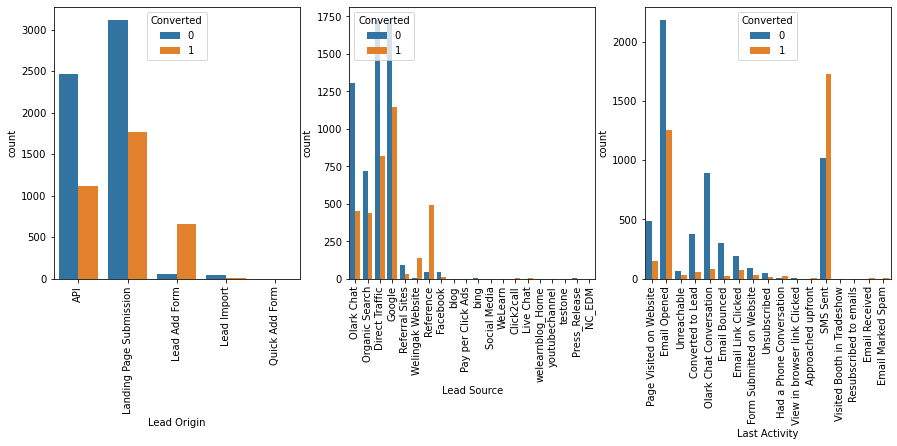

In [183]:
list_2=list(enumerate(df_cat_1.columns))

plt.figure(figsize=(15,5))
for i in list_2[:3]:
    plt.subplot(1,3,(i[0]+1))
    plt.xlabel(i[1])
    plt.xticks(rotation=90)
    sns.countplot(x=i[1],data=df,hue='Converted')
    



#### Inferences:
- Sending sms and email have more convertion rate compared to other activities
- Most of the traffic is from Google and direct source. The company should concentrate on marketing through Facebook and Youtube
- Most the lead are coming for Landing page which have low conversion rate. The company should concetrate on accquiring lead from exciting customers.

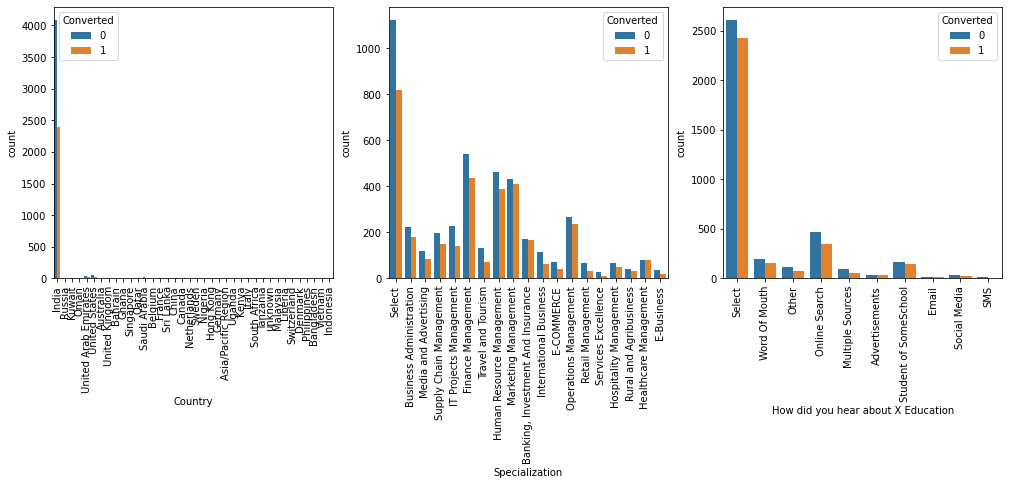

In [184]:
plt.figure(figsize=(17,5))
for i in list_2[3:6]:
    plt.subplot(1,3,(i[0]+1-3))
    plt.xlabel(i[1])
    plt.xticks(rotation=90)
    sns.countplot(x=i[1],data=df,hue='Converted')
    

#### Inferences:
- most of the applications are from India 
- Specialization and How did you features have high Select values which implies as null
- But interesting people now will to specify their specialization have high conversion rate
- Out of all specialization customers with Finance, Human Resource, Marketing specialization have opted the course mostly.
- Online search is the major get on 
- the company should invest more into marketing strategies. 


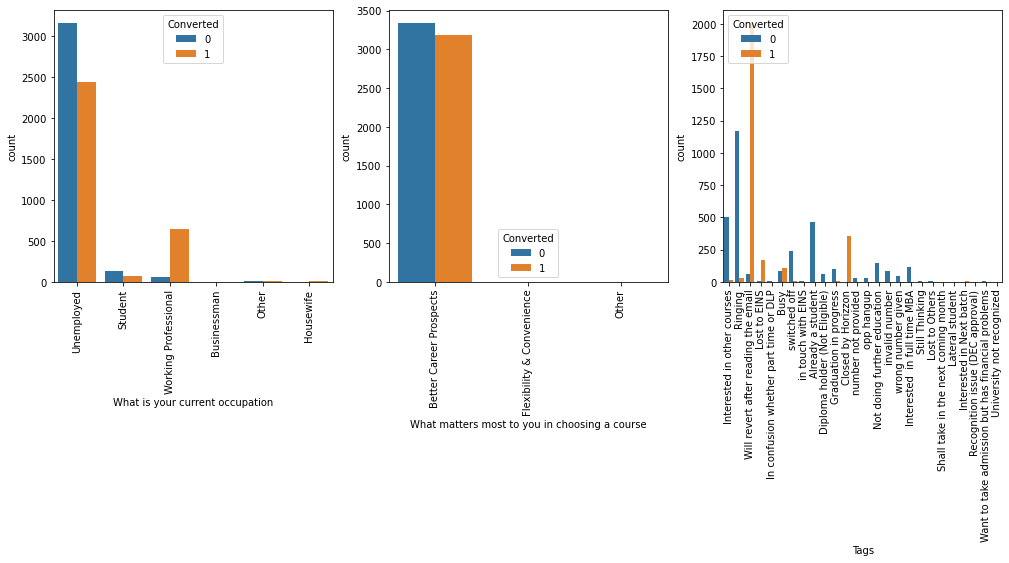

In [185]:
plt.figure(figsize=(17,5))
for i in list_2[6:9]:
    plt.subplot(1,3,(i[0]+1-6))
    plt.xlabel(i[1])
    plt.xticks(rotation=90)
    sns.countplot(x=i[1],data=df,hue='Converted')

#### Inferences:
- most of the people opt this course for better career prospects.
- people who have reverted after the email have higher chance of converting to the program.
- Most of the customers are unemployed. Students and working proffesion are not showing much interest in the courses. 
- Either the company can make the courses flexible to both students and Working professionals.
- Also can concentrate more on Unemployed customers.

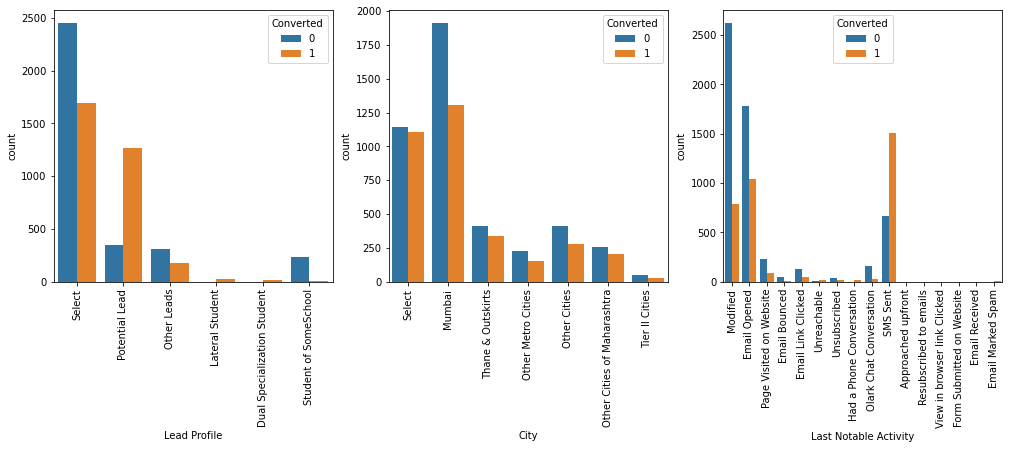

In [186]:
plt.figure(figsize=(17,5))
for i in list_2[9:12]:
    plt.subplot(1,3,(i[0]+1-9))
    plt.xlabel(i[1])
    plt.xticks(rotation=90)
    sns.countplot(x=i[1],data=df,hue='Converted')

#### Inferences:
- there are many missing values in city
- Most of the users are from mumbai city 
- Potential lead have converted 

In [187]:
# checking the correlation with numeric variables
df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.030395,0.362483,-0.003328
TotalVisits,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.362483,0.221240,1.000000,0.320361
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000


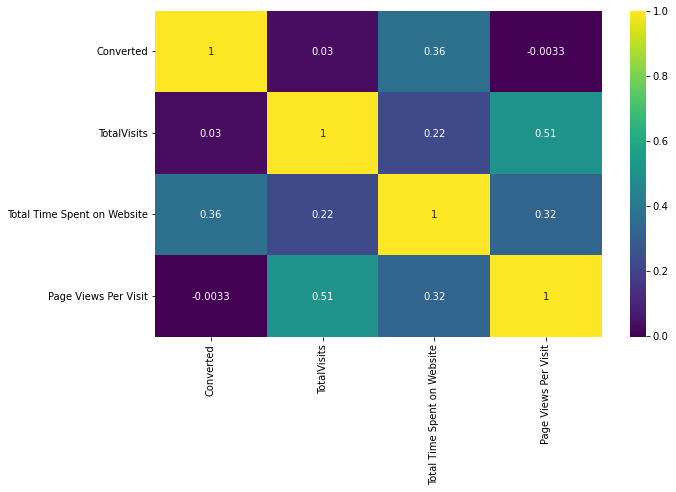

In [188]:
# plotting the correlation on heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

## Inferences:
- __Total time spent__ has maximum correlation with convertion rate
- there corraltion between page views per visit and total visits


## <font color ='green'>Step3: Data preprocessing

In [189]:
df.shape

(9240, 30)

### Deleting unwanted columns

In [190]:
# dropping the binary columns which have no influence on target

df = df.drop(bin_cols,axis=1)

In [191]:
df.shape

(9240, 16)

### Replacing the 'Select' with Nan

In [192]:
# Replacing 'Select' with Nan columns: 'City','Lead profile','Specialization','How did you hear about X Education'

df[['City','Lead Profile','Specialization','How did you hear about X Education']] = df[['City','Lead Profile','Specialization','How did you hear about X Education']].replace('Select',np.nan)

#### Handling missing values

In [193]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.000000
dtype: float64

'How did you hear about X Education','Lead Profile' have more than 50% missing values

In [194]:
# dropping columns 
df = df.drop(['How did you hear about X Education','Lead Profile'],axis=1)

In [195]:
# droppin rows for columns having less than 5% missing values
df = df.dropna(subset=['TotalVisits','Page Views Per Visit','Lead Source'])

In [196]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2296
Specialization                                   3282
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Tags                                             3327
City                                             3575
Last Notable Activity                               0
dtype: int64

__the remaining missing values can be imputed with random values from the columns__

### Imputing missing values with random values
- col : 'City','What is your current occupation','Specialization','Country'

In [197]:
df['City_imputed'] = df['City']
df['Current_occupation_imputed'] = df['What is your current occupation']
df['Specialization_imputed'] = df['Specialization']
df['Country_imputed'] = df['Country']

In [198]:
df['City_imputed'][df['City_imputed'].isnull()] = df['City'].dropna().sample(df['City'].isnull().sum()).values
df['Current_occupation_imputed'][df['Current_occupation_imputed'].isnull()] = df['What is your current occupation'].dropna().sample(df['What is your current occupation'].isnull().sum()).values
df['Specialization_imputed'][df['Specialization_imputed'].isnull()] = df['Specialization'].dropna().sample(df['Specialization'].isnull().sum()).values
df['Country_imputed'][df['Country_imputed'].isnull()] = df['Country'].dropna().sample(df['Country'].isnull().sum()).values

In [199]:
# dropping the columns with null values
df = df.drop(['City','What is your current occupation','Specialization','Country'],axis =1)

In [200]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
What matters most to you in choosing a course    2702
Tags                                             3327
Last Notable Activity                               0
City_imputed                                        0
Current_occupation_imputed                          0
Specialization_imputed                              0
Country_imputed                                     0
dtype: int64

Tags are assigned by the company, so we cannot replace that with random values. So The null values are replaced by 'not given'
and What matters to you can be replaced by mode value.

In [201]:
df['What matters most to you in choosing a course'].mode()

0    Better Career Prospects
Name: What matters most to you in choosing a course, dtype: object

In [202]:
# fill NAs
df['Tags'] = df['Tags'].fillna('Not given')

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [203]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What matters most to you in choosing a course    0
Tags                                             0
Last Notable Activity                            0
City_imputed                                     0
Current_occupation_imputed                       0
Specialization_imputed                           0
Country_imputed                                  0
dtype: int64

In [204]:
df.shape

(9074, 14)

### Handling outliers

In [205]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


In [206]:
# Keeping the values in 95th quatile range
df = df[df['TotalVisits']<df['TotalVisits'].quantile(0.99)]
df = df[df['Page Views Per Visit']<df['Page Views Per Visit'].quantile(0.99)]


In [207]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8863.000000,8863.000000,8863.000000,8863.000000
mean,0.378089,3.098387,478.122193,2.236941
std,0.484937,2.821961,544.532372,1.835885
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,1.000000
50%,0.000000,3.000000,240.000000,2.000000
75%,1.000000,4.000000,913.000000,3.000000
max,1.000000,16.000000,2272.000000,8.000000


In [208]:
df.shape

(8863, 14)

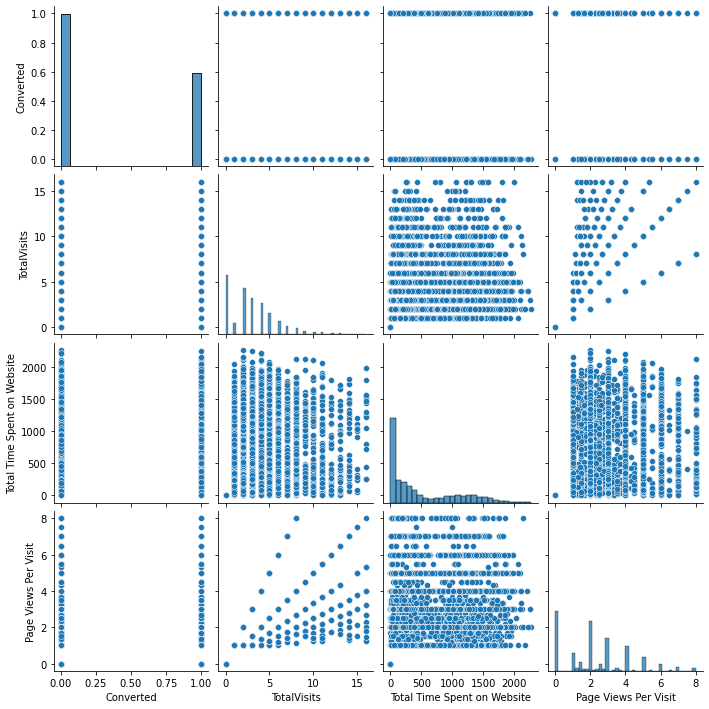

In [209]:
# plotting the numerical data after outliers removed
sns.pairplot(df)
plt.show()

Numerical feature data distribution is right skewed, applying log transformation or standardizing might give better results.

#### Shuffling the Data set for final view

In [210]:
df.head(2)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What matters most to you in choosing a course,Tags,Last Notable Activity,City_imputed,Current_occupation_imputed,Specialization_imputed,Country_imputed
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Better Career Prospects,Interested in other courses,Modified,Thane & Outskirts,Unemployed,Operations Management,India
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Better Career Prospects,Ringing,Email Opened,Thane & Outskirts,Unemployed,International Business,India


__As Tags are given by the company to potentail leads this column can be dropped which might not be useful to solve our problem.__

In [211]:
df = df.drop('Tags',axis=1)

In [212]:
# getting the numerical and categorical columns
num = list(df._get_numeric_data().columns)

print(num)

['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [213]:
cat = list(df.drop(num,axis=1))
print(cat)

['Lead Origin', 'Lead Source', 'Last Activity', 'What matters most to you in choosing a course', 'Last Notable Activity', 'City_imputed', 'Current_occupation_imputed', 'Specialization_imputed', 'Country_imputed']


In [214]:
# bring the numerical column towards end to make the column transformatio easy

df_final = df[cat]
df_final[num] = df[num]


In [215]:
df_final.shape

(8863, 13)

In [216]:
df_final.head()

,Lead Origin,Lead Source,Last Activity,What matters most to you in choosing a course,Last Notable Activity,City_imputed,Current_occupation_imputed,Specialization_imputed,Country_imputed,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,API,Olark Chat,Page Visited on Website,Better Career Prospects,Modified,Thane & Outskirts,Unemployed,Operations Management,India,0,0.0,0,0.0
1,API,Organic Search,Email Opened,Better Career Prospects,Email Opened,Thane & Outskirts,Unemployed,International Business,India,0,5.0,674,2.5
2,Landing Page Submission,Direct Traffic,Email Opened,Better Career Prospects,Email Opened,Mumbai,Student,Business Administration,India,1,2.0,1532,2.0
3,Landing Page Submission,Direct Traffic,Unreachable,Better Career Prospects,Modified,Mumbai,Unemployed,Media and Advertising,India,0,1.0,305,1.0
4,Landing Page Submission,Google,Converted to Lead,Better Career Prospects,Modified,Mumbai,Unemployed,Supply Chain Management,India,1,2.0,1428,1.0


## <font color ='green'>Step4: Model training

### Steps :
1. Define X,y
2. Splitting the data to train and test with ratio (70/30)
3. Creating columns transform:
    - scaling the numerical features using standard scalar
    - encoding the categorical data
4. Extracting the important features using Random forest
5. Train and evaluate the model with all the features
6. Apply RFE - Train and evaluate the model 
7. Check the values and VIF of features for further elemination 
8. Train and Evaluate the final model
9. plot the ROC 
10. change the cutt-off to achieve Precission Recall Tradeoff



### Import sklearn libraries

In [217]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Defining X,y

In [218]:
# extracting target and independet data
X = df_final.drop('Converted',axis=1)
y = df_final['Converted']

In [219]:
X.head()

,Lead Origin,Lead Source,Last Activity,What matters most to you in choosing a course,Last Notable Activity,City_imputed,Current_occupation_imputed,Specialization_imputed,Country_imputed,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,API,Olark Chat,Page Visited on Website,Better Career Prospects,Modified,Thane & Outskirts,Unemployed,Operations Management,India,0.0,0,0.0
1,API,Organic Search,Email Opened,Better Career Prospects,Email Opened,Thane & Outskirts,Unemployed,International Business,India,5.0,674,2.5
2,Landing Page Submission,Direct Traffic,Email Opened,Better Career Prospects,Email Opened,Mumbai,Student,Business Administration,India,2.0,1532,2.0
3,Landing Page Submission,Direct Traffic,Unreachable,Better Career Prospects,Modified,Mumbai,Unemployed,Media and Advertising,India,1.0,305,1.0
4,Landing Page Submission,Google,Converted to Lead,Better Career Prospects,Modified,Mumbai,Unemployed,Supply Chain Management,India,2.0,1428,1.0


### Splitting the data in train and test

In [220]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [221]:
print(X_train.shape)
print(X_test.shape)

(6204, 12)
(2659, 12)


### Creating Column Transformer

Column transformation to be done:
- scaling values
- onehot encoding cat columns

In [222]:
# creating trandformer object 

scalar = StandardScaler()

encod = OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore')

transformer = ColumnTransformer([('tnf1',encod,['Lead Origin', 'Lead Source', 'Last Activity', 
                                                'What matters most to you in choosing a course',
                                                'Last Notable Activity', 'City_imputed', 
                                                'Current_occupation_imputed', 'Specialization_imputed', 'Country_imputed']),
                               ('tnf2',scalar,['TotalVisits', 'Total Time Spent on Website', 
                                               'Page Views Per Visit'])],remainder='drop')



In [223]:
# Transforming X_train and X_test
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)


In [224]:
# Extracting the feature names
cat_features = list(transformer.transformers_[0][1].get_feature_names(cat))

num_features = list(transformer.transformers_[1][1].get_feature_names_out())

features = cat_features+num_features

In [225]:
X_train_trans.shape

(6204, 113)

In [226]:
X_train_final = pd.DataFrame(data = X_train_trans,columns=features)
X_test_final = pd.DataFrame(data = X_test_trans,columns=features)

In [227]:
X_train_final.shape

(6204, 113)

In [228]:
X_test_final.shape

(2659, 113)

### <font color ='darkblue'>Model1: Fitting the model with all the features

In [229]:
# creating regression object
reg = LogisticRegression()

# fitting the data
reg.fit(X_train_final,y_train)

LogisticRegression()

In [230]:
y_pred_tr = reg.predict(X_train_final)

print('accuracy score for train set:',accuracy_score(y_train,y_pred_tr))

y_pred_tes = reg.predict(X_test_final)

print('accuracy score for test set:',accuracy_score(y_test,y_pred_tes))

accuracy score for train set: 0.811411992263056
accuracy score for test set: 0.8066942459571267


In [231]:
recall_score(y_test,y_pred_tes)

0.6880829015544041

In [232]:
precision_score(y_test,y_pred_tes)

0.7571265678449259

In [233]:
cross_val_score(reg,X_train_final,y_train,cv=5,scoring='accuracy').mean()

0.8040000259936055

In [234]:
cross_val_score(reg,X_test_final,y_test,cv=5,scoring='accuracy').mean()

0.804053920111012

In [235]:
confusion_matrix(y_test,y_pred_tes)

array([[1481,  213],
       [ 301,  664]], dtype=int64)

In [236]:
confusion_matrix(y_train,y_pred_tr)

array([[3361,  457],
       [ 713, 1673]], dtype=int64)

<font color= red>__Accuracy score of the model is 80% though it is good model we have low recall value. We can check eliminating the features might improve the model__

### Feature Selection with RFE

In [237]:
# creating the RFE object
rfe = RFE(reg,n_features_to_select=15)
rfe.fit(X_train_final,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [238]:
# Extracting the features selected by RFE

col = list(X_train_final.columns[rfe.support_])
col

['Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Unsubscribed',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Page Visited on Website',
 'Current_occupation_imputed_Housewife',
 'Current_occupation_imputed_Working Professional',
 'Country_imputed_Italy']

### <font color ='darkblue'>Model 2: with features selected in RFE

In [239]:
y_pred_rfe = rfe.predict(X_test_final)

In [240]:
accuracy_score(y_test,y_pred_rfe)

0.7547950357277172

In [241]:
recall_score(y_test,y_pred_rfe)

0.6155440414507772

In [242]:
precision_score(y_test,y_pred_rfe)

0.6788571428571428

<font color= red>__There isn't much improvement in the model accuracy. We can reevaluate the model with stats model to check for significance and multicollinearity__

### Evaluating the model using Stats model

In [243]:
X_train_rfe = X_train_final[col]

In [244]:
X_train_rfe.shape

(6204, 15)

In [245]:
y_train.values.reshape(-1,1).shape

(6204, 1)

In [249]:
# creating function to fit the model and get the summary
def get_summary(X_train):
    X_train = sm.add_constant(X_train)
    logm1 = sm.GLM(y_train.values.reshape(-1,1), X_train, family = sm.families.Binomial())
    res = logm1.fit()
    return res.summary()

# creating function to check VIF
def check_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [250]:
get_summary(X_train_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3200.5
Date:                Sat, 22 Oct 2022   Deviance:                       6401.1
Time:                        11:31:47   Pearson chi2:                 6.32e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2598
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               0.5787      0.060      9.599      0.000       0.461       0.697
Lead Origin_Lead Add Form                           2.6949      0.211     12.745      0.000       2.280       3.109
Lead Source_Olark Chat                              0.0118      0.086      0.137      0.891      -0.157       0.180
Lead Source_Welingak Website                        2.3720      1.032      2.297      0.022       0.348       4.396
Last Activity_Email Bounced                        -2.9165      0.393     -7.424      0.000      -3.687      -2.147
Last Activity_Had a Phone Conversation              1.6204      0.697      2.324      0.020       0.254       2.987
Last Activity_Olark Chat Conversation              -1.4743      0.185     -7.980      0.000      -1.836      -1.112
Last Activity_Unsubscribed                         -1.4403      0.384     -3.748      0.000      -2.194      -0.687
Last Notable Activity_Email Link Clicked           -2.1701      0.253     -8.591      0.000      -2.665      -1.675
Last Notable Activity_Email Opened                 -1.4077      0.077    -18.291      0.000      -1.559      -1.257
Last Notable Activity_Modified                     -1.8312      0.085    -21.503      0.000      -1.998      -1.664
Last Notable Activity_Olark Chat Conversation      -1.2131      0.332     -3.654      0.000      -1.864      -0.562
Last Notable Activity_Page Visited on Website      -1.7055      0.175     -9.743      0.000      -2.049      -1.362
Current_occupation_imputed_Housewife                2.2154      0.878      2.522      0.012       0.494       3.937
Current_occupation_imputed_Working Professional     1.3266      0.102     13.065      0.000       1.128       1.526
Country_imputed_Italy                             -21.9094   1.19e+04     -0.002      0.999   -2.33e+04    2.33e+04
===================================================================================================================
"""

In [251]:
check_vif(X_train_rfe)

,Features,VIF
5,Last Activity_Olark Chat Conversation,1.94
9,Last Notable Activity_Modified,1.54
1,Lead Source_Olark Chat,1.50
0,Lead Origin_Lead Add Form,1.36
10,Last Notable Activity_Olark Chat Conversation,1.30
2,Lead Source_Welingak Website,1.27
8,Last Notable Activity_Email Opened,1.11
13,Current_occupation_imputed_Working Professional,1.11
3,Last Activity_Email Bounced,1.10
7,Last Notable Activity_Email Link Clicked,1.02


<font color= red>__All the features look significant and VIF are also not so high. We can further get feature importance with Tree classifier and train the model with best to check for any improvement__

### Feature Importance with Random Forest  classifier

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
# creating the object 
rf = RandomForestClassifier(n_estimators=5,max_depth=20)

rf.fit(X_train_final,y_train)

RandomForestClassifier(max_depth=20, n_estimators=5)

In [254]:
f = X_train_final.columns
f.shape

(113,)

In [255]:
l = pd.DataFrame(data = rf.feature_importances_, columns=['Importance'])

l['Features'] = X_train_final.columns


In [256]:
top_15 = l.sort_values(by = 'Importance',ascending = False,ignore_index=True).head(15)
top_15

,Importance,Features
0,0.255912,Total Time Spent on Website
1,0.064240,Last Notable Activity_SMS Sent
2,0.061893,Last Activity_SMS Sent
3,0.056211,Lead Source_Reference
4,0.055977,TotalVisits
5,0.046906,Page Views Per Visit
6,0.042690,Last Activity_Olark Chat Conversation
7,0.030368,Last Notable Activity_Modified
8,0.022113,Lead Origin_Landing Page Submission
9,0.021894,Lead Origin_Lead Add Form


## <font color ='darkblue'> Model 3: Training model with top 15 features

In [257]:
X_train_15 = X_train_final[list(top_15['Features'])]
X_test_15 = X_test_final[list(top_15['Features'])]

In [258]:
X_train_15.shape

(6204, 15)

In [259]:
y_train.shape

(6204,)

In [260]:
# training the model
reg_15 = LogisticRegression()
reg_15.fit(X_train_15,y_train)

LogisticRegression()

In [261]:
# Evaluation model
y_pred_15 = reg_15.predict(X_test_15)

print('Accuracy score of the model:',accuracy_score(y_test,y_pred_15))
print('Recall score of the model:',recall_score(y_test,y_pred_15))
print('Precision of the model:',precision_score(y_test,y_pred_15))

Accuracy score of the model: 0.805189921022941
Recall score of the model: 0.6849740932642487
Precision of the model: 0.7554285714285714


<font color= red>__There isn't much improvement. Need to check the significance of the features and multicollinearity with stats model__

In [262]:
get_summary(X_train_15)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.8
Date:                Sat, 22 Oct 2022   Deviance:                       5519.6
Time:                        11:32:05   Pearson chi2:                 6.25e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3578
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -1.2651      0.208     -6.076      0.000      -1.673      -0.857
Total Time Spent on Website                         1.0115      0.037     27.213      0.000       0.939       1.084
Last Notable Activity_SMS Sent                      1.0784      0.177      6.089      0.000       0.731       1.426
Last Activity_SMS Sent                              0.9472      0.156      6.074      0.000       0.642       1.253
Lead Source_Reference                             -17.8857   1.63e+04     -0.001      0.999   -3.19e+04    3.19e+04
TotalVisits                                         0.2223      0.047      4.763      0.000       0.131       0.314
Page Views Per Visit                               -0.2858      0.052     -5.540      0.000      -0.387      -0.185
Last Activity_Olark Chat Conversation              -0.7729      0.176     -4.383      0.000      -1.119      -0.427
Last Notable Activity_Modified                     -0.3925      0.103     -3.803      0.000      -0.595      -0.190
Lead Origin_Landing Page Submission                -0.5848      0.081     -7.177      0.000      -0.745      -0.425
Lead Origin_Lead Add Form                          21.0368   1.63e+04      0.001      0.999   -3.19e+04    3.19e+04
Last Activity_Email Opened                          0.6269      0.107      5.879      0.000       0.418       0.836
Current_occupation_imputed_Working Professional     1.3585      0.203      6.695      0.000       0.961       1.756
Current_occupation_imputed_Unemployed               0.0641      0.179      0.358      0.720      -0.286       0.415
Lead Source_Welingak Website                      -15.6056   1.63e+04     -0.001      0.999   -3.19e+04    3.19e+04
City_imputed_Other Cities                          -0.0940      0.101     -0.928      0.354      -0.293       0.105
===================================================================================================================
"""

In [263]:
check_vif(X_train_15)

,Features,VIF
9,Lead Origin_Lead Add Form,133.78
3,Lead Source_Reference,106.44
13,Lead Source_Welingak Website,28.43
12,Current_occupation_imputed_Unemployed,7.32
1,Last Notable Activity_SMS Sent,6.72
2,Last Activity_SMS Sent,6.55
8,Lead Origin_Landing Page Submission,3.11
10,Last Activity_Email Opened,3.01
7,Last Notable Activity_Modified,2.82
5,Page Views Per Visit,2.48


__there are insignificant and correlated features.Dropping these features and checking the model peformance__

In [264]:
# dropping high p-value features

X_train_sm_1 = X_train_15.drop('Lead Source_Reference',axis=1)

# checking the summary
get_summary(X_train_sm_1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.9
Date:                Sat, 22 Oct 2022   Deviance:                       5519.7
Time:                        11:32:07   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3578
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -1.2651      0.208     -6.076      0.000      -1.673      -0.857
Total Time Spent on Website                         1.0116      0.037     27.218      0.000       0.939       1.084
Last Notable Activity_SMS Sent                      1.0788      0.177      6.091      0.000       0.732       1.426
Last Activity_SMS Sent                              0.9469      0.156      6.072      0.000       0.641       1.253
TotalVisits                                         0.2224      0.047      4.765      0.000       0.131       0.314
Page Views Per Visit                               -0.2858      0.052     -5.541      0.000      -0.387      -0.185
Last Activity_Olark Chat Conversation              -0.7730      0.176     -4.384      0.000      -1.119      -0.427
Last Notable Activity_Modified                     -0.3924      0.103     -3.802      0.000      -0.595      -0.190
Lead Origin_Landing Page Submission                -0.5850      0.081     -7.179      0.000      -0.745      -0.425
Lead Origin_Lead Add Form                           3.1547      0.220     14.321      0.000       2.723       3.586
Last Activity_Email Opened                          0.6268      0.107      5.878      0.000       0.418       0.836
Current_occupation_imputed_Working Professional     1.3585      0.203      6.695      0.000       0.961       1.756
Current_occupation_imputed_Unemployed               0.0643      0.179      0.359      0.719      -0.286       0.415
Lead Source_Welingak Website                        2.2766      1.033      2.205      0.027       0.253       4.301
City_imputed_Other Cities                          -0.0941      0.101     -0.929      0.353      -0.293       0.104
===================================================================================================================
"""

In [265]:
# dropping Specialization_imputed_Human Resource Management
X_train_sm_2 = X_train_sm_1.drop('City_imputed_Other Cities',axis=1)

get_summary(X_train_sm_2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2760.3
Date:                Sat, 22 Oct 2022   Deviance:                       5520.6
Time:                        11:32:14   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3577
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -1.2788      0.208     -6.155      0.000      -1.686      -0.872
Total Time Spent on Website                         1.0116      0.037     27.228      0.000       0.939       1.084
Last Notable Activity_SMS Sent                      1.0830      0.177      6.115      0.000       0.736       1.430
Last Activity_SMS Sent                              0.9434      0.156      6.049      0.000       0.638       1.249
TotalVisits                                         0.2227      0.047      4.771      0.000       0.131       0.314
Page Views Per Visit                               -0.2852      0.052     -5.530      0.000      -0.386      -0.184
Last Activity_Olark Chat Conversation              -0.7715      0.176     -4.375      0.000      -1.117      -0.426
Last Notable Activity_Modified                     -0.3914      0.103     -3.792      0.000      -0.594      -0.189
Lead Origin_Landing Page Submission                -0.5843      0.081     -7.174      0.000      -0.744      -0.425
Lead Origin_Lead Add Form                           3.1571      0.220     14.331      0.000       2.725       3.589
Last Activity_Email Opened                          0.6273      0.107      5.883      0.000       0.418       0.836
Current_occupation_imputed_Working Professional     1.3598      0.203      6.699      0.000       0.962       1.758
Current_occupation_imputed_Unemployed               0.0649      0.179      0.363      0.717      -0.286       0.416
Lead Source_Welingak Website                        2.2744      1.033      2.202      0.028       0.250       4.299
===================================================================================================================
"""

In [266]:
X_train_sm_3 = X_train_sm_2.drop('Current_occupation_imputed_Unemployed',axis=1)

get_summary(X_train_sm_3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6191
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2760.4
Date:                Sat, 22 Oct 2022   Deviance:                       5520.7
Time:                        11:32:15   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3577
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -1.2160      0.115    -10.571      0.000      -1.442      -0.991
Total Time Spent on Website                         1.0117      0.037     27.230      0.000       0.939       1.085
Last Notable Activity_SMS Sent                      1.0832      0.177      6.117      0.000       0.736       1.430
Last Activity_SMS Sent                              0.9441      0.156      6.054      0.000       0.638       1.250
TotalVisits                                         0.2227      0.047      4.772      0.000       0.131       0.314
Page Views Per Visit                               -0.2849      0.052     -5.525      0.000      -0.386      -0.184
Last Activity_Olark Chat Conversation              -0.7727      0.176     -4.383      0.000      -1.118      -0.427
Last Notable Activity_Modified                     -0.3917      0.103     -3.795      0.000      -0.594      -0.189
Lead Origin_Landing Page Submission                -0.5852      0.081     -7.187      0.000      -0.745      -0.426
Lead Origin_Lead Add Form                           3.1554      0.220     14.328      0.000       2.724       3.587
Last Activity_Email Opened                          0.6268      0.107      5.880      0.000       0.418       0.836
Current_occupation_imputed_Working Professional     1.2977      0.109     11.884      0.000       1.084       1.512
Lead Source_Welingak Website                        2.2789      1.033      2.207      0.027       0.255       4.303
===================================================================================================================
"""

In [267]:
check_vif(X_train_sm_3)

,Features,VIF
2,Last Activity_SMS Sent,6.35
1,Last Notable Activity_SMS Sent,6.19
7,Lead Origin_Landing Page Submission,2.66
4,Page Views Per Visit,2.43
3,TotalVisits,2.21
6,Last Notable Activity_Modified,2.06
8,Lead Origin_Lead Add Form,1.59
9,Last Activity_Email Opened,1.55
5,Last Activity_Olark Chat Conversation,1.43
11,Lead Source_Welingak Website,1.28


In [268]:
X_train_sm_4 = X_train_sm_3.drop('Last Notable Activity_SMS Sent',axis=1)

get_summary(X_train_sm_4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6192
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2779.5
Date:                Sat, 22 Oct 2022   Deviance:                       5558.9
Time:                        11:32:16   Pearson chi2:                 6.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3537
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -0.9836      0.107     -9.164      0.000      -1.194      -0.773
Total Time Spent on Website                         1.0113      0.037     27.284      0.000       0.939       1.084
Last Activity_SMS Sent                              1.6414      0.105     15.617      0.000       1.435       1.847
TotalVisits                                         0.1957      0.046      4.240      0.000       0.105       0.286
Page Views Per Visit                               -0.2709      0.051     -5.301      0.000      -0.371      -0.171
Last Activity_Olark Chat Conversation              -0.7258      0.177     -4.092      0.000      -1.073      -0.378
Last Notable Activity_Modified                     -0.7740      0.084     -9.258      0.000      -0.938      -0.610
Lead Origin_Landing Page Submission                -0.5760      0.081     -7.101      0.000      -0.735      -0.417
Lead Origin_Lead Add Form                           3.1480      0.221     14.247      0.000       2.715       3.581
Last Activity_Email Opened                          0.4501      0.103      4.389      0.000       0.249       0.651
Current_occupation_imputed_Working Professional     1.2824      0.109     11.784      0.000       1.069       1.496
Lead Source_Welingak Website                        2.2244      1.033      2.154      0.031       0.200       4.248
===================================================================================================================
"""

In [269]:
check_vif(X_train_sm_4)

,Features,VIF
6,Lead Origin_Landing Page Submission,2.56
3,Page Views Per Visit,2.43
2,TotalVisits,2.20
5,Last Notable Activity_Modified,1.61
7,Lead Origin_Lead Add Form,1.58
1,Last Activity_SMS Sent,1.55
8,Last Activity_Email Opened,1.55
4,Last Activity_Olark Chat Conversation,1.36
10,Lead Source_Welingak Website,1.28
0,Total Time Spent on Website,1.24


## <font color ='darkblue'>Model 4: With filtered features

In [270]:
reg_2 = LogisticRegression(solver='saga')
reg_2.fit(X_train_sm_4,y_train)

LogisticRegression(solver='saga')

In [271]:
X_test_4 = X_test_final[X_train_sm_4.columns]

In [272]:
X_train_sm_4.shape

(6204, 11)

In [273]:
X_test_4.shape

(2659, 11)

In [274]:
y_pred_4 = reg_2.predict(X_test_4)
y_pred_4_tr = reg_2.predict(X_train_sm_4)

In [275]:
y_pred_4_tr[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

## <font color ='green'>Step5: Evaluating final model

In [276]:
print('Accuracy score of the model:',accuracy_score(y_test,y_pred_4))
print('Recall score of the model:',recall_score(y_test,y_pred_4))
print('Precision of the model:',precision_score(y_test,y_pred_4))

Accuracy score of the model: 0.7927792403159082
Recall score of the model: 0.6290155440414508
Precision of the model: 0.75875


In [277]:
print('Accuracy score of the train:',accuracy_score(y_train,y_pred_4_tr))
print('Recall score of the train:',recall_score(y_train,y_pred_4_tr))
print('Precision of the train:',precision_score(y_train,y_pred_4_tr))

Accuracy score of the train: 0.793036750483559
Recall score of the train: 0.643336127409891
Precision of the train: 0.779979674796748


In [278]:
print('cross val score for train set:',cross_val_score(reg_2,X_train_sm_4,y_train,cv=5,scoring='accuracy').mean())
print('cross val score for test set:',cross_val_score(reg_2,X_test_4,y_test,cv=5,scoring='accuracy').mean())

cross val score for train set: 0.7911036884926308
cross val score for test set: 0.7954058876003568


<font color= red>__The accuracy didn't drop. So we can conclude the features used in the final model are the most important features for the model__

In [279]:
# Evaluating the confusion matrix
confusion = confusion_matrix(y_train.values.reshape(-1,1), y_pred_4_tr )
confusion


array([[3385,  433],
       [ 851, 1535]], dtype=int64)

In [280]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [281]:
# Calculating the sensitivity
TP/(TP+FN)

0.643336127409891

In [282]:
# Calculating the specificity
TN/(TN+FP)

0.8865898376113148

<font color= red>___With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 69% and specificity of around 87%.___</font>

## <font color ='green'>Step6:Getting the optimum value for cut-off 

<font color= green>__As our main objective is to reduce the number of Fasle Negatives we need to imporove our Recall score by adjusting the cut-off__

In [283]:
X_train_final_sm = sm.add_constant(X_train_sm_4)
logm1 = sm.GLM(y_train.values.reshape(-1,1), X_train_final_sm, family = sm.families.Binomial())
res = logm1.fit()



In [284]:
y_pred_train = res.predict(X_train_final_sm)
y_pred_train[:10]

0    0.357252
1    0.355577
2    0.056806
3    0.299958
4    0.196918
5    0.795049
6    0.953636
7    0.110112
8    0.382697
9    0.090384
dtype: float64

In [285]:
# Reshaping to an array
y_pred_train = y_pred_train.values.reshape(-1)
y_pred_train[:10]

array([0.35725225, 0.35557674, 0.05680629, 0.29995807, 0.19691813,
       0.79504859, 0.95363639, 0.11011189, 0.38269718, 0.09038411])

In [286]:
# Data frame with predictions
y_pred_train_final = pd.DataFrame({'Converted':y_train.values, 'pred_prob':y_pred_train})
y_pred_train_final.head()

,Converted,pred_prob
0,1,0.357252
1,0,0.355577
2,0,0.056806
3,0,0.299958
4,0,0.196918


In [287]:
# converting the predicted probabiliest to binary values
y_pred_train_final['Predicted'] = y_pred_train_final['pred_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_pred_train_final.sample(5)

,Converted,pred_prob,Predicted
4420,1,0.135263,0
347,0,0.036773,0
4780,0,0.079180,0
2820,0,0.699334,1
4152,0,0.073120,0


### Optimise Cut off (ROC Curve)

In [288]:
# ROC function
def draw_curve( act, prb ):
    fpr, tpr, thresholds = roc_curve( act, prb,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( act, prb )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [289]:
fpr, tpr, thresholds = roc_curve( y_pred_train_final['Converted'],y_pred_train_final['pred_prob'],drop_intermediate = False )

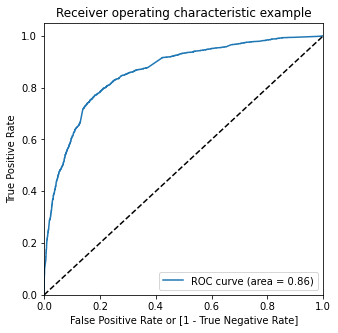

In [290]:
draw_curve(y_pred_train_final['Converted'],y_pred_train_final['pred_prob'])

<font color = 'red'>__Area under ROC is 0.86. Which can be considered as a good values__

We need to find an optimum values to meet the Sensitivity and specificity Trade-off. To do so we shall create a a data frame with different cutt-off point and plot the ROC curve.

In [291]:
# Creating data frame with different cut-off points.

cut_off = [float(x/10) for x in range(1,10)]
cut_off

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [292]:
for i in cut_off:
    y_pred_train_final[i] = y_pred_train_final['pred_prob'].map(lambda x:1 if x>i else 0)

In [293]:
y_pred_train_final.head()

,Converted,pred_prob,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.357252,0,1,1,1,0,0,0,0,0,0
1,0,0.355577,0,1,1,1,0,0,0,0,0,0
2,0,0.056806,0,0,0,0,0,0,0,0,0,0
3,0,0.299958,0,1,1,0,0,0,0,0,0,0
4,0,0.196918,0,1,0,0,0,0,0,0,0,0


In [294]:
# checking the accuracy,sensitivity, specificity for each cutt-off
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
eval_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in cut_off:
    cm1 = confusion_matrix(y_pred_train_final['Converted'], y_pred_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    eval_df.loc[i] =[ i ,accuracy,sensi,speci]
eval_df

,prob,accuracy,sensi,speci
0.1,0.1,0.561251,0.968567,0.306705
0.2,0.2,0.695358,0.918692,0.555788
0.3,0.3,0.775790,0.834032,0.739392
0.4,0.4,0.799645,0.767812,0.819539
0.5,0.5,0.793037,0.643336,0.886590
0.6,0.6,0.780948,0.564124,0.916448
0.7,0.7,0.765313,0.476530,0.945783
0.8,0.8,0.732914,0.351215,0.971451
0.9,0.9,0.687137,0.201593,0.990571


<Figure size 2000x1600 with 0 Axes>

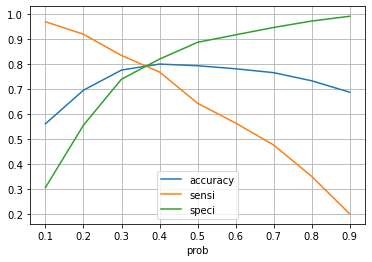

In [295]:
# plotting the values
plt.figure(figsize=(10,8),dpi=200)
eval_df.plot(x='prob',y=['accuracy','sensi','speci'],grid=True)
plt.show()

<font color= red>___From the graph it is visible that the optimal cut off is at 0.37.___</font>

In [296]:
y_pred_train_final['final_prediction'] = y_pred_train_final.pred_prob.map( lambda x: 1 if x > 0.37 else 0)
y_pred_train_final.sample(5)

,Converted,pred_prob,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
5422,0,0.036773,0,0,0,0,0,0,0,0,0,0,0
2951,0,0.405004,0,1,1,1,1,0,0,0,0,0,1
3738,0,0.289405,0,1,1,0,0,0,0,0,0,0,0
116,0,0.690778,1,1,1,1,1,1,1,0,0,0,1
422,1,0.923409,1,1,1,1,1,1,1,1,1,1,1


In [297]:
# checking the accurancy
accuracy_score(y_train,y_pred_train_final['final_prediction'])

0.7936814958091554

In [298]:
cm2 = confusion_matrix(y_train,y_pred_train_final['final_prediction'])
cm2

array([[3045,  773],
       [ 507, 1879]], dtype=int64)

In [299]:
# Substituting the value of true positive
TP = cm2[1,1]
# Substituting the value of true negatives
TN = cm2[0,0]
# Substituting the value of false positives
FP = cm2[0,1] 
# Substituting the value of false negatives
FN = cm2[1,0]

In [300]:
# Calculating the sensitivity
TP/(TP+FN)

0.7875104777870914

In [301]:
# Calculating the specificity
TN/(TN+FP)

0.7975379779989523

In [302]:
precision_score(y_train,y_pred_train_final['final_prediction'])

0.7085218702865762

In [303]:
recall_score(y_train,y_pred_train_final['final_prediction'])

0.7875104777870914

<font color= red>___With the current cut off as 0.37 we have accuracy, sensitivity and specificity of around 80%.___</font>

## <font color ='green'> Step7: Evaluting the model on test set

In [304]:
# trimming the data as per train set
X_test_final_sm = X_test_final[X_train_sm_4.columns]

In [305]:
X_test_final_sm.shape

(2659, 11)

In [306]:
# predicitng on test set
y_pred_test = res.predict(sm.add_constant(X_test_final_sm))

In [307]:
# Creating dataframe
y_pred_test_final = pd.DataFrame({'Converted':y_test.values, 'pred_prob':y_pred_test})
y_pred_test_final.sample(5)

,Converted,pred_prob
104,1,0.655674
2247,1,0.982990
743,0,0.211555
796,0,0.155781
2351,1,0.853034


In [308]:
y_pred_test_final['final_prediction'] = y_pred_test_final['pred_prob'].map(lambda x: 1 if x > 0.40 else 0)
y_pred_test_final.sample(5)

,Converted,pred_prob,final_prediction
850,1,0.717104,1
1810,1,0.764725,1
1314,0,0.104011,0
16,1,0.887435,1
461,1,0.560319,1


In [309]:
# checking the accuracy of the model
accuracy_score(y_test,y_pred_test_final['final_prediction'])

0.7980443775855585

In [310]:
# precision score
precision_score(y_pred_test_final['Converted'], y_pred_test_final.final_prediction)

0.7061657032755299

In [311]:
# recall score
recall_score(y_pred_test_final['Converted'], y_pred_test_final.final_prediction)

0.7595854922279792

### <font color='red'> __With cut-off 0.41 we have accuracy of around 80%, precision 70% and recall 75%. As we can see we improved the recall score from first model. We can finalize this model.__

## <font color ='green'> Step8: Conclusions
    
    1. The company can set their Lead score cut-off at 41 i.e, any lead above 41 score can be considered potential and below it can be neglected.
    2. The following are the features which matter the most to predict the potential customers:
        1.Total Time Spent on Website
        2.  Last Activity
            a.SMS Sent
            b.Olark chat
            c.Modified
        3. Total Visits
        4. Lead Origin
            a.Landing page
            b.Lead add form
        5. Page Views per visit
        6. Lead Source
            a.Welinggak Website
            b.Google
        7. Current occupation
            a. Working professionals
      The company should focus on these features to increase more potential leads. As per our EDA, the company can improve its performance in some of the features. For example the company concentrate more on working proffessional and also should try to get more referal lead sources as the conversion rate is high when the lead is from referal.